![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 20 - Metric Learning </center>
### <center> Fisher Discriminant Analysis (FDA) </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/20_MetricLearning/MainFDA.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Load Iris data:

In [2]:
from sklearn.datasets import load_iris

iris            = load_iris(as_frame=True)
dIris           = iris.data
dIris['Target'] = iris.target_names[iris.target]
dIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Define 3 datasets:
1. The raw dataset $\boldsymbol{X}$: `mX`.
2. The normalized (z-score) dataset $\tilde{\boldsymbol{X}}$: `mNX`
3. The raw dataset after some random (linear) transformation $\boldsymbol{A}\cdot\boldsymbol{X}$: `mAX`

In [3]:
mX = dIris.drop(columns=['Target']).values
vY = iris.target

mX  -= np.mean(mX, axis=0)
mNX  = mX / np.std(mX, axis=0)
mAX  = mX @ np.random.randn(4, 4)

### Apply PCA:
PCA is sensitive to linear transformations (and normalizations)

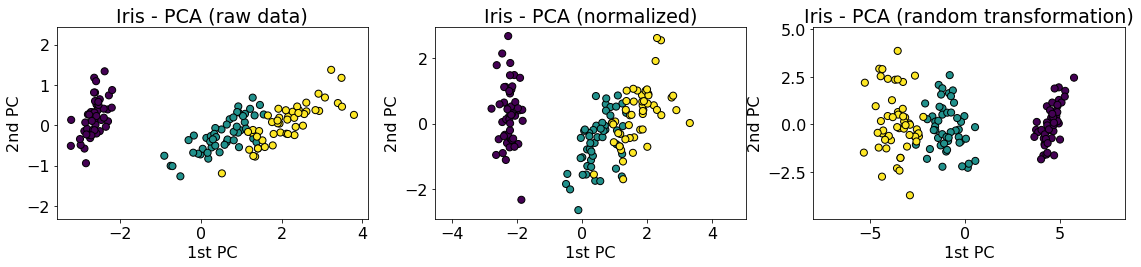

In [4]:
from sklearn.decomposition import PCA

mPca  = PCA(n_components=2).fit(mX) .transform(mX)
mPcaN = PCA(n_components=2).fit(mNX).transform(mNX)
mPcaA = PCA(n_components=2).fit(mAX).transform(mAX)

dArgs = {'s':50, 'c':vY, 'edgecolor':'k'}

plt.figure(figsize=(16, 4))
plt.subplot(1,3,1); plt.scatter(*mPca.T,  **dArgs); plt.axis('equal'); plt.xlabel('1st PC'); plt.ylabel('2nd PC'); plt.title('Iris - PCA (raw data)')
plt.subplot(1,3,2); plt.scatter(*mPcaN.T, **dArgs); plt.axis('equal'); plt.xlabel('1st PC'); plt.ylabel('2nd PC'); plt.title('Iris - PCA (normalized)')
plt.subplot(1,3,3); plt.scatter(*mPcaA.T, **dArgs); plt.axis('equal'); plt.xlabel('1st PC'); plt.ylabel('2nd PC'); plt.title('Iris - PCA (random transformation)')
plt.tight_layout()
plt.show()


### FDA
$$\boldsymbol{S}_{W}:=\sum_{k=1}^{K}N_{k}\boldsymbol{\Sigma}_{k}$$
We set $\boldsymbol{\mu}_{x}=\boldsymbol{0}$, thus:
$$\boldsymbol{S}_{B}:=\sum_{k=1}^{K}N_{k}\boldsymbol{\mu}_{k}\boldsymbol{\mu}_{k}^{T}$$
$$\boldsymbol{w}^{\star}=\arg\max_{\boldsymbol{w}\in\mathbb{R}^{D}}\frac{\boldsymbol{w}^{T}\boldsymbol{S}_{B}\boldsymbol{w}}{\boldsymbol{w}^{T}\boldsymbol{S}_{W}\boldsymbol{w}}$$
The solution are the top eigenvectors of $\boldsymbol{S}_{W}^{-1}\boldsymbol{S}_{B}$:
$$\implies\boldsymbol{S}_{W}^{-1}\boldsymbol{S}_{B}\boldsymbol{w}^{\star}=\lambda\boldsymbol{w}^{\star}$$
$$\boxed{\boldsymbol{z}_{i}=\boldsymbol{W}^{T}\boldsymbol{x}_{i}}$$

In [5]:
from scipy.linalg import eigh

def FDA(mX, vY):
    N, D   = mX.shape
    mX     = mX - mX.mean(0)
    vC     = np.unique(vY)
    K      = len(vC)
    
    mSw = np.zeros((D, D))
    mSb = np.zeros((D, D))
    for kk in vC:
        vIdx = vY == kk
        Nk   = np.sum(vIdx)
        mXk  = mX[vIdx,:]
        vD   = np.mean(mXk, axis=0)[None,:]
     
        mSb += Nk * vD.T @ vD
        mSw += Nk * np.cov(mXk.T)

    vL, mW = eigh(mSb, mSw)
    vIdx   = np.argsort(-vL)[:K-1]
    mW     = mW[:,vIdx]
    mZ     = mX @ mW
    
    return mZ

### Apply FDA:

In [6]:
mZ  = FDA(mX,  vY)
mNZ = FDA(mNX, vY)
mAZ = FDA(mAX, vY)

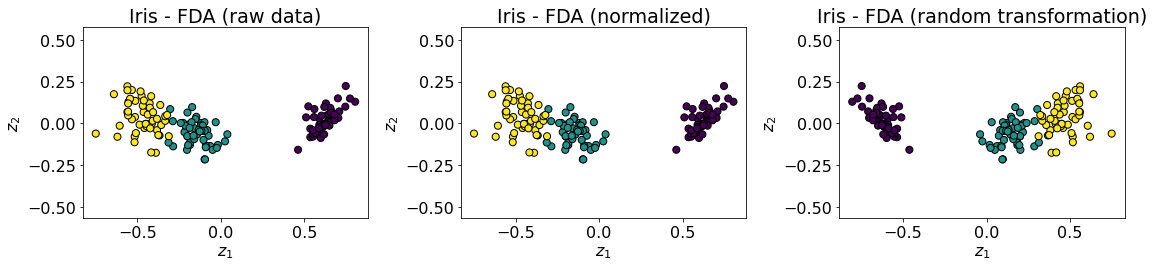

In [7]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1); plt.scatter(*mZ .T, **dArgs); plt.axis('equal'); plt.xlabel('$z_1$'); plt.ylabel('$z_2$'); plt.title('Iris - FDA (raw data)')
plt.subplot(1,3,2); plt.scatter(*mNZ.T, **dArgs); plt.axis('equal'); plt.xlabel('$z_1$'); plt.ylabel('$z_2$'); plt.title('Iris - FDA (normalized)')
plt.subplot(1,3,3); plt.scatter(*mAZ.T, **dArgs); plt.axis('equal'); plt.xlabel('$z_1$'); plt.ylabel('$z_2$'); plt.title('Iris - FDA (random transformation)')
plt.tight_layout()
plt.show        ()